# News Mood
----

### Analysis
* Fox News had the highest overall sentiment score (0.25).
* All four news outlets had positive overall sentiment scores.
* 40% of all tweets (from all outlets) were neutral (0.0). CBS had the highest number of neutral(0.0) tweets, at 39.

In [ ]:
%matplotlib inline
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import (consumer_key,
                   consumer_secret,
                   access_token,
                   access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [11]:
target_user = ('@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes')
results_list = []

for user in target_user:
    counter = 1
    oldest_tweet = None
    for x in range(5):
        public_tweets = api.user_timeline(user, max_id=oldest_tweet)
        
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet['text'])
            compound = results['compound']
            pos = results['pos']
            neu = results['neu']
            neg = results['neg']
            date = (tweet['created_at'])
            text = (tweet['text'])
            
            oldest_tweet = tweet['id'] - 1
            
            results_list.append({'Username': user,
                                 'Text': text,
                                 'Date': date,
                                 'Compound':compound,
                                 'Positive Score': pos,
                                 'Neutral Score': neu,
                                 'Negative Score': neg,
                                 'Tweets Ago': counter})
            
            counter += 1

In [16]:
results_df = pd.DataFrame.from_dict(results_list)
results_df.to_csv('NewsMood_Data.csv')
results_df.head()

,Compound,Date,Negative Score,Neutral Score,Positive Score,Text,Tweets Ago,Username
0,0.7227,Sat Oct 06 21:04:05 +0000 2018,0.000,0.790,0.210,Franklin and his gang are now the main dealers...,1,@BBC
1,-0.1027,Sat Oct 06 19:31:09 +0000 2018,0.202,0.649,0.149,A poetic account of the Troubles in Northern I...,2,@BBC
2,0.0000,Sat Oct 06 18:06:06 +0000 2018,0.000,1.000,0.000,Most polite stag do ever 😂 https://t.co/Vdz6ab...,3,@BBC
3,0.0000,Sat Oct 06 17:07:02 +0000 2018,0.000,1.000,0.000,A horse walks into a bar... https://t.co/0e9rc...,4,@BBC
4,0.4939,Sat Oct 06 16:05:06 +0000 2018,0.000,0.819,0.181,Hundreds of sculptures lie at the bottom of th...,5,@BBC


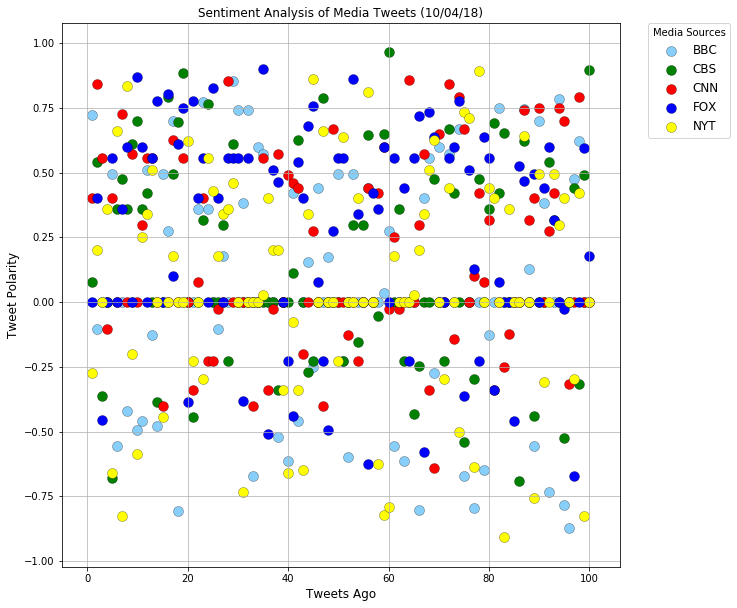

In [13]:
bbc_x = results_df.loc[results_df['Username'] == '@BBC', ['Tweets Ago']]
bbc_y = results_df.loc[results_df['Username'] == '@BBC', ['Compound']]
cbs_x = results_df.loc[results_df['Username'] == '@CBS', ['Tweets Ago']]
cbs_y = results_df.loc[results_df['Username'] == '@CBS', ['Compound']]
cnn_x = results_df.loc[results_df['Username'] == '@CNN', ['Tweets Ago']]
cnn_y = results_df.loc[results_df['Username'] == '@CNN', ['Compound']]
fox_x = results_df.loc[results_df['Username'] == '@FoxNews', ['Tweets Ago']]
fox_y = results_df.loc[results_df['Username'] == '@FoxNews', ['Compound']]
nyt_x = results_df.loc[results_df['Username'] == '@nytimes', ['Tweets Ago']]
nyt_y = results_df.loc[results_df['Username'] == '@nytimes', ['Compound']]

plt.figure(figsize=(10,10))
plt.scatter(bbc_x, bbc_y, s=100, c='lightskyblue', edgecolors='black', linewidths=0.25, label='BBC')
plt.scatter(cbs_x, cbs_y, s=100, c='green', edgecolors='black', linewidths=0.25, label='CBS')
plt.scatter(cnn_x, cnn_y, s=100, c='red', edgecolors='black', linewidths=0.25, label='CNN')
plt.scatter(fox_x, fox_y, s=100, c='blue', edgecolors='black', linewidths=0.25, label='FOX')
plt.scatter(nyt_x, nyt_y, s=100, c='yellow', edgecolors='black', linewidths=0.25, label='NYT')

plt.title("Sentiment Analysis of Media Tweets (10/04/18)", fontsize='large')
plt.xlabel("Tweets Ago", fontsize='large')
plt.ylabel("Tweet Polarity", fontsize='large')
plt.grid(alpha=.9)

lgnd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Media Sources', markerscale=1, scatterpoints=1, numpoints=1, mode='expanded', fontsize='large')

plt.savefig('Sentiment Analysis of Media Tweets.png')
plt.show()

In [14]:
grp_results = results_df.groupby(['Username'])
user_avg = grp_results['Compound'].mean()

user_avg_df = pd.DataFrame({'Username': grp_results['Username'].first(),
                            'Overall Sentiment': user_avg})
user_avg_df

,Username,Overall Sentiment
Username,,
@BBC,@BBC,0.047530
@CBS,@CBS,0.136751
@CNN,@CNN,0.181012
@FoxNews,@FoxNews,0.249712
@nytimes,@nytimes,0.061312


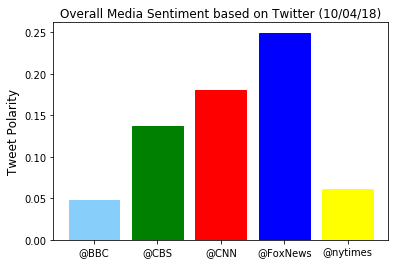

In [15]:
x_axis = user_avg_df['Username']
y_axis = user_avg_df['Overall Sentiment']

bar_chart = plt.bar(x_axis, y_axis, align="center")
bar_chart[0].set_color('lightskyblue')
bar_chart[1].set_color('green')
bar_chart[2].set_color('red')
bar_chart[3].set_color('blue')
bar_chart[4].set_color('yellow')

plt.title("Overall Media Sentiment based on Twitter (10/04/18)", fontsize='large')
plt.ylabel("Tweet Polarity", fontsize='large')
plt.savefig('Overall Media Sentiment based on Twitter.png')
plt.show()